# Exploratory Data Analysis

This notebook provides tools to analyze the distribution of your variables along with correlations that exist among them. The supporting Python code is in EDATools.py. Many of the functions have additional arguments that are defaulted. For more details look through the code. Also add any functions you find useful.

# Outline 

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Part One - Distributional Analysis](#part-one---distributional-analysis)
    - [Load Data and Specify Variables](#load-data-and-specify-variables)
    - [Distribution of Target Variable](#target-variable)
    - [Distribution of Predictor Variables](#predictor-variables)
- [Part Two - Predictor Correlations and Clustering](#part-two---predictor-correlation)
    - [Correlation Between Continuous Variables](#correlation-between-continuous-variables)
    - [Correlation Between Categorical Variables](#correlation-between-categorical-variables)
    - [Correlation Between Continuous and Categorical Variables](#correlation-between-continuous-and-categorical-variables)

<!-- MarkdownTOC -->

<a name="part-one---distributional-analysis"></a>
# Part One - Distributional Analysis

<a name="load-data-and-specify-variables"></a>
## Load Data and Specify Variables

In this section we will load our dataset, print the index of each feature and then specify which variables are predictors, target, controls (optional), and weight (optional). For variables with null values, null_value_cleanup will create an IS_NULL indicator variable. If you prefer another method of dealing with missing values, like imputing values (e.g. mean, median, mode), write a function to do it, put it in EDATools, and call it below. 

In [32]:
import EDATools
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm

dataset = sm.datasets.get_rdataset("Schooling", "Ecdat").data

EDATools.null_value_cleanup(dataset)

# Print the index of each feature.
for i, col in enumerate(dataset.columns):
    print(i, col)

0 smsa66
1 smsa76
2 nearc2
3 nearc4
4 nearc4a
5 nearc4b
6 ed76
7 ed66
8 age76
9 daded
10 nodaded
11 momed
12 nomomed
13 momdad14
14 sinmom14
15 step14
16 south66
17 south76
18 lwage76
19 famed
20 black
21 wage76
22 enroll76
23 kww
24 kww_ISNULL
25 iqscore
26 iqscore_ISNULL
27 mar76
28 libcrd14
29 exp76


Take a look at the top few rows of the data set.

In [33]:
pd.set_option('display.max_columns', None) # This allows you to display larger data frames

dataset.head(10)

,smsa66,smsa76,nearc2,nearc4,nearc4a,nearc4b,ed76,ed66,age76,daded,nodaded,momed,nomomed,momdad14,sinmom14,step14,south66,south76,lwage76,famed,black,wage76,enroll76,kww,kww_ISNULL,iqscore,iqscore_ISNULL,mar76,libcrd14,exp76
0,yes,yes,no,no,no,no,7,5,29,9.94,yes,10.25,yes,yes,no,no,no,no,6.306275,9,yes,548,no,15.0,0,0.0,1,yes,no,16
1,yes,yes,no,no,no,no,12,11,27,8.00,no,8.00,no,yes,no,no,no,no,6.175867,8,no,481,no,35.0,0,93.0,0,yes,yes,9
2,yes,yes,no,no,no,no,12,12,34,14.00,no,12.00,no,yes,no,no,no,no,6.580639,2,no,721,no,42.0,0,103.0,0,yes,yes,16
3,yes,yes,yes,yes,yes,no,11,11,27,11.00,no,12.00,no,yes,no,no,no,no,5.521461,6,no,250,no,25.0,0,88.0,0,yes,yes,10
4,yes,yes,yes,yes,yes,no,12,12,34,8.00,no,7.00,no,yes,no,no,no,no,6.591674,8,no,729,no,34.0,0,108.0,0,yes,no,16
5,yes,yes,yes,yes,yes,no,12,11,26,9.00,no,12.00,no,yes,no,no,no,no,6.214608,6,no,500,no,38.0,0,85.0,0,yes,yes,8
6,yes,yes,yes,yes,yes,no,18,16,33,14.00,no,14.00,no,yes,no,no,no,no,6.336826,1,no,565,no,41.0,0,119.0,0,yes,yes,9
7,yes,yes,yes,yes,yes,no,14,13,29,14.00,no,14.00,no,yes,no,no,no,no,6.410175,1,no,608,no,46.0,0,108.0,0,yes,yes,9
8,yes,yes,yes,yes,yes,no,12,12,28,12.00,no,12.00,no,yes,no,no,no,no,6.052089,3,no,425,no,32.0,0,96.0,0,4,no,10
9,yes,yes,yes,yes,yes,no,12,12,29,12.00,no,12.00,no,yes,no,no,no,no,6.244167,3,no,515,no,34.0,0,97.0,0,yes,yes,11


Using the index of each variable above, specify the index/indices of predictors, target, controls, and weight variables. If there are variables that are numeric, but categorical, store their indicies in numeric_cat_index. 

In [35]:
predictors = np.array([2,3,6,7,8,9,10,11,12,14,15,20,23,25,27,28,29])
numeric_cat_index = np.array([2,3,10,12,14,15,20,27,28])
target = 21

Check if any of the categorical variables have levels with thin data.

In [36]:
EDATools.rare_level_check(dataset, predictors, numeric_cat_index, p_verbose=True)

checking nearc2
checking nearc4
checking nodaded
checking nomomed
checking sinmom14
checking step14
checking black
checking mar76
mar76 has thin data in level 2, the portion is 0.004651162790697674.
mar76 has thin data in level 3, the portion is 0.0009966777408637873.
mar76 has thin data in level Null_Value, the portion is 0.002325581395348837.
checking libcrd14
libcrd14 has thin data in level Null_Value, the portion is 0.004318936877076412.


<a name="target-variable"></a>
## Distribution of Target

This section will provide information about the target variable distribution. If your target variable is categorical, set p_target_categorical = True and p_pp_plots = False. In this case you'll see a bar chart along with counts for each category.
<br>
If your target is continuous, set p_target_categorical = False and p_pp_plots = True. This option will give summary statistics, and will compare the target distribution to hypothetical distributions. Maximum likelihood estimatation is used to fit the empirical data to a normal, lognormal, gamma, and inverse gaussian distribution. For each distribution, the Kolmogorov-Smirinov (KS) statistic is computed, a pp-plot is given, and the fitted pdf is plotted over the histogram. A good fit is characterized by a low KS statistic, a pp-plot close to the line $y = x$, and the histogram close to the fitted pdf. Many modeling algorithms can take advantage of choosing an appropriate distribution. Add any other distributions you would like to test.


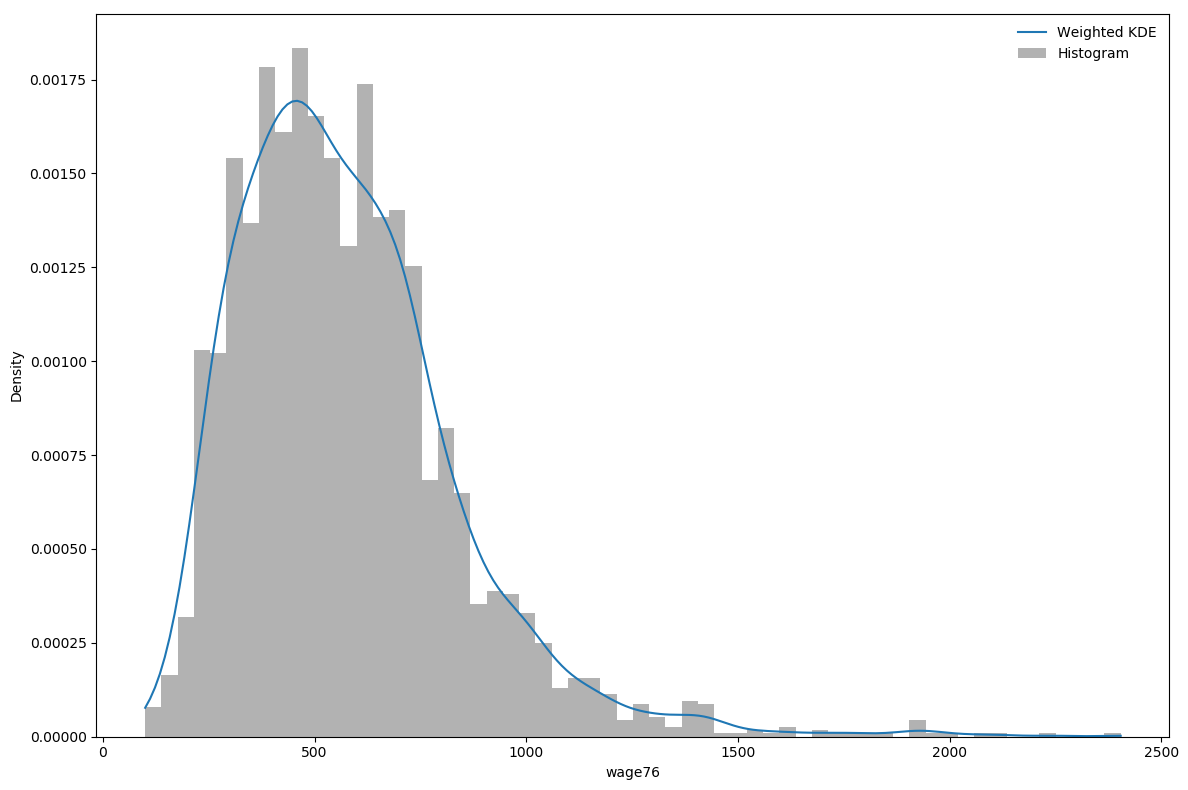

               wage76
Weight    3010.000000
Mean       577.282392
StdDev     262.958302
Min        100.000000
25%        394.250000
50%        537.500000
75%        708.750000
Max       2404.000000
Skewness     1.480323
Kurtosis     4.491885


In [37]:
EDATools.TargetDist(dataset, target, p_target_categorical = False, p_pp_plots = False)

<a name="predictor-variables"></a>
## Distribution of Predictors

For each categorical variable, a bar chart and the count/weight for each category is given. For each continuous variable, summary statistics are calculated and the kernel density estimation KDE (a smoothed histogram) is plotted with the histogram. This section helps to understand your predictors and identify potential data issues.

Distributions - Predictors:


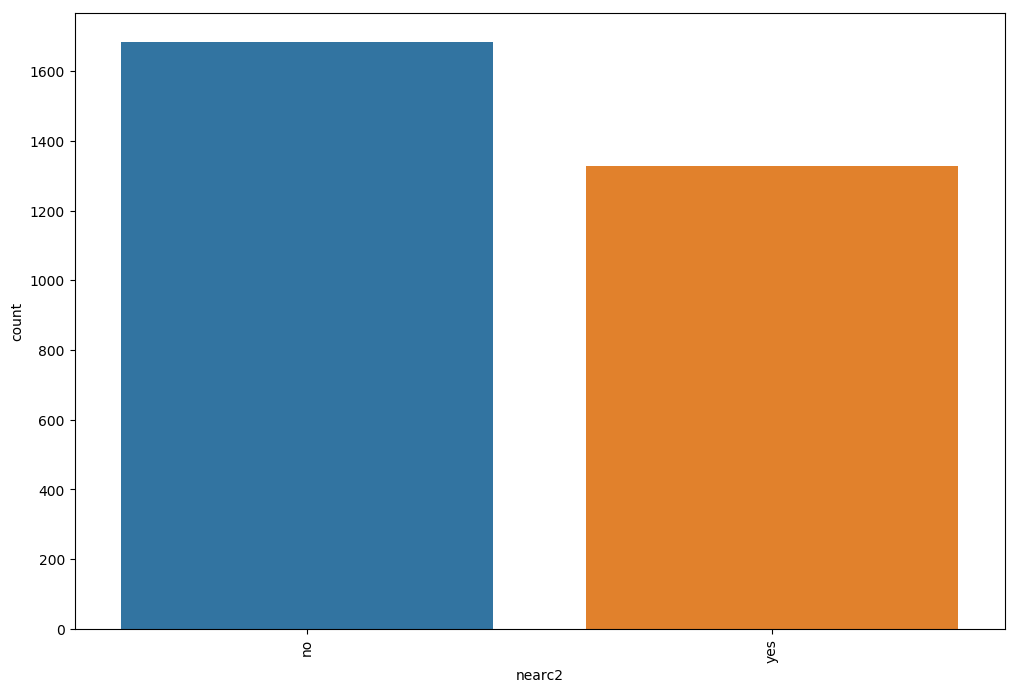

Level                     Weight
no                        1683
yes                       1327


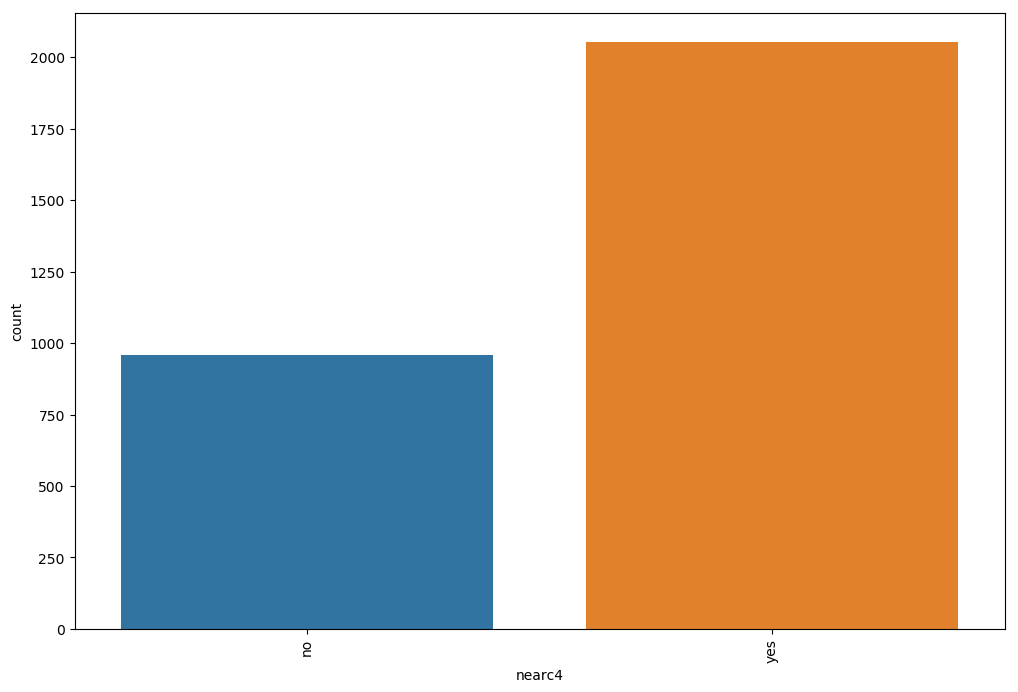

Level                     Weight
no                        957
yes                       2053


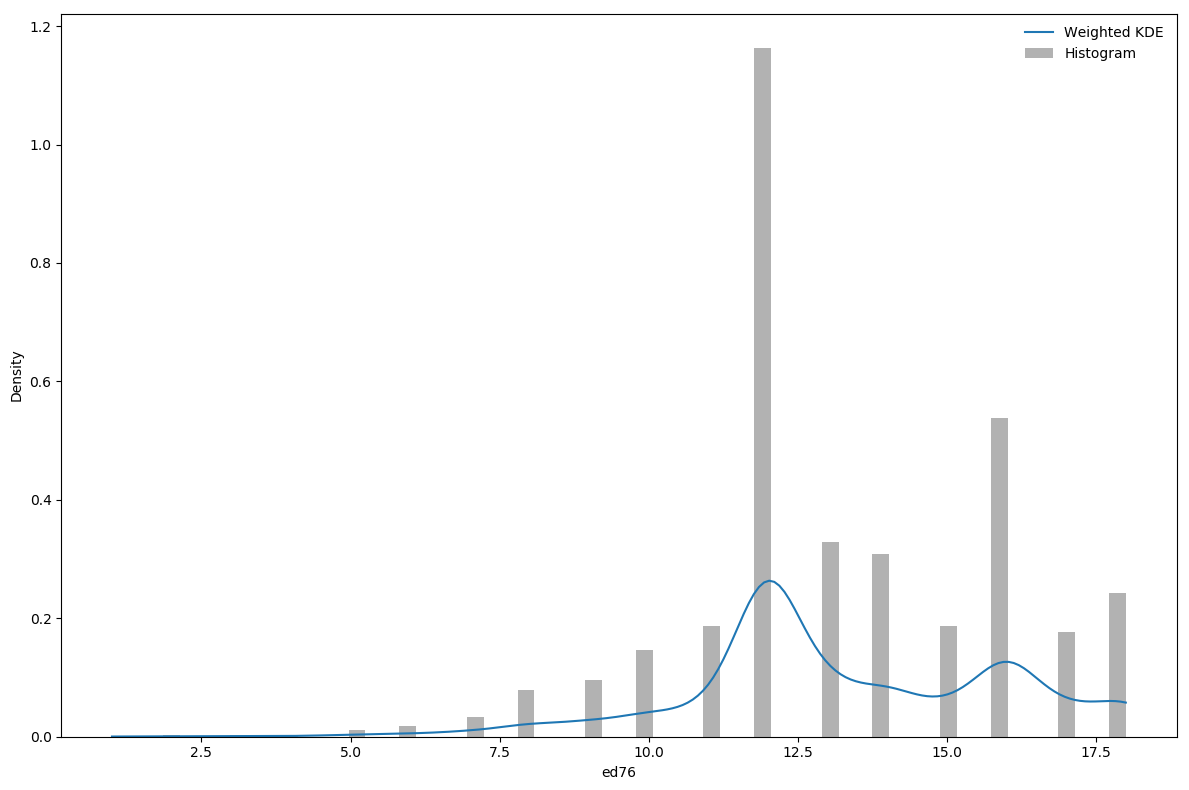

                 ed76
Weight    3010.000000
Mean        13.263455
StdDev       2.676913
Min          1.000000
25%         12.000000
50%         13.000000
75%         16.000000
Max         18.000000
Skewness    -0.232206
Kurtosis     0.283009


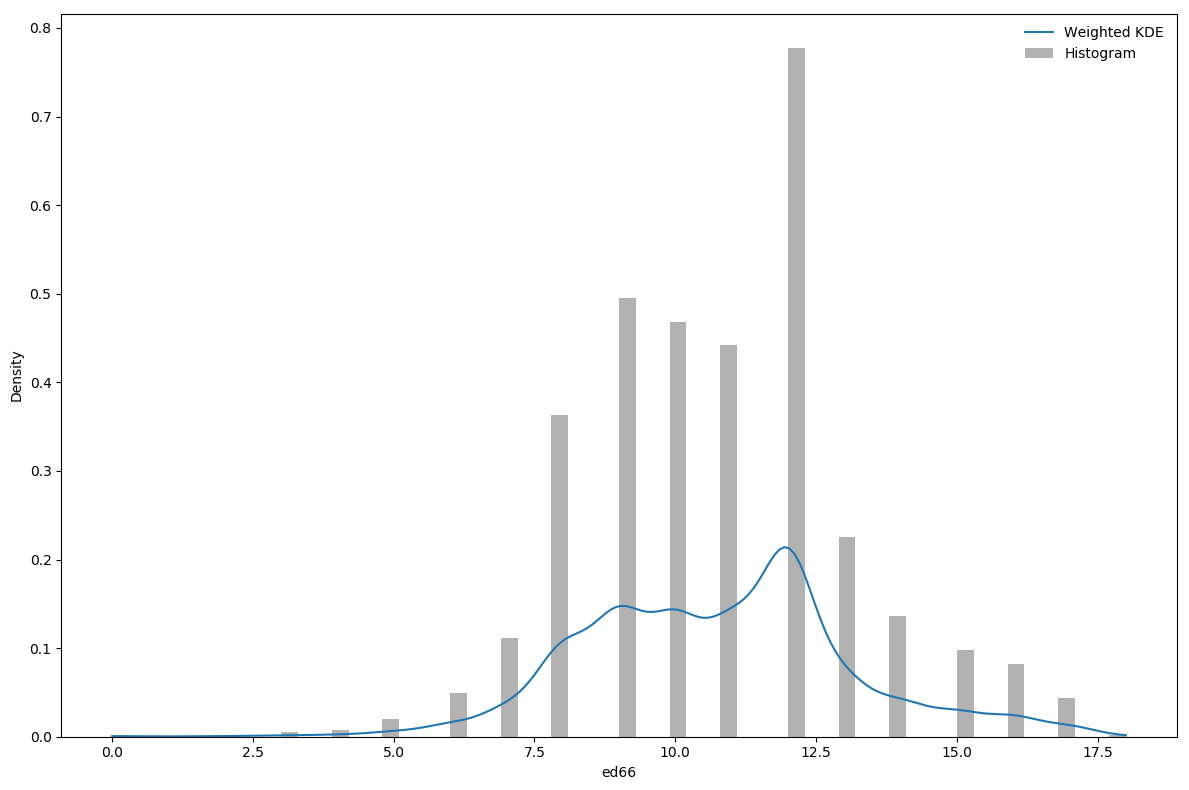

                 ed66
Weight    3010.000000
Mean        10.758140
StdDev       2.371869
Min          0.000000
25%          9.000000
50%         11.000000
75%         12.000000
Max         18.000000
Skewness     0.076243
Kurtosis     0.534401


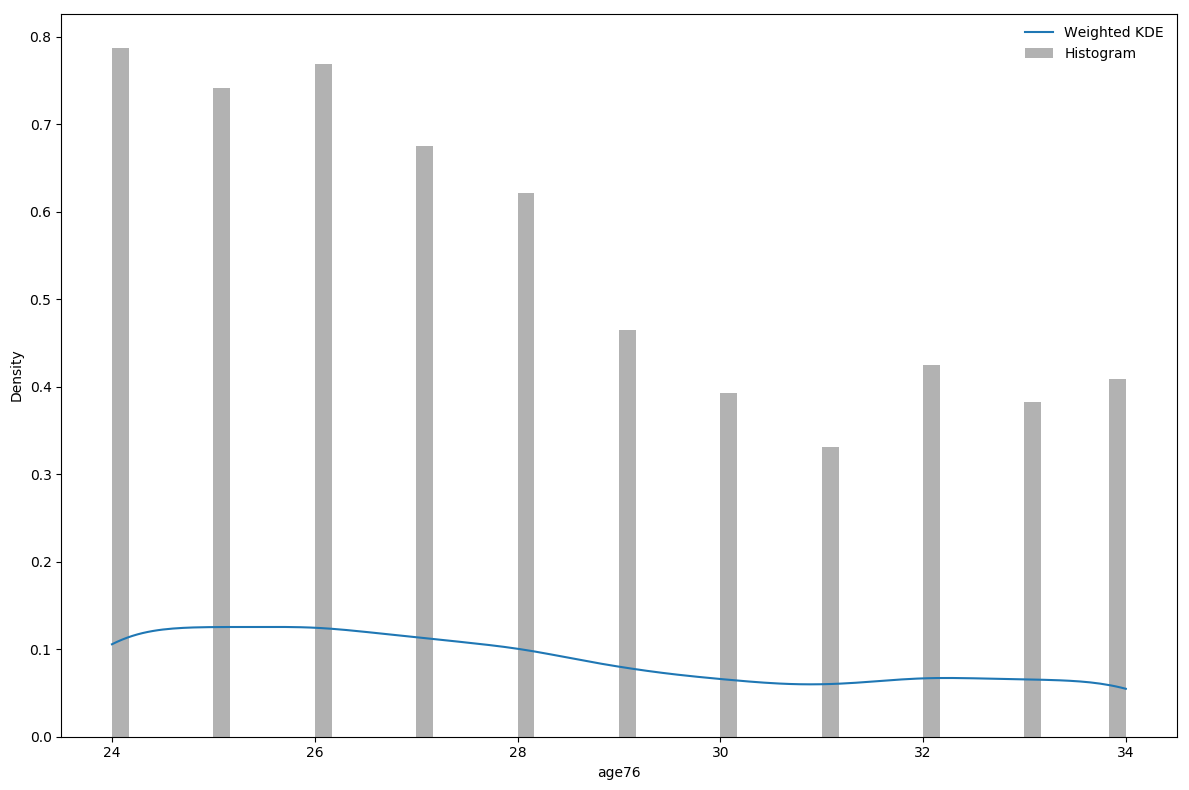

                age76
Weight    3010.000000
Mean        28.119601
StdDev       3.137004
Min         24.000000
25%         25.000000
50%         28.000000
75%         31.000000
Max         34.000000
Skewness     0.418218
Kurtosis    -1.030290


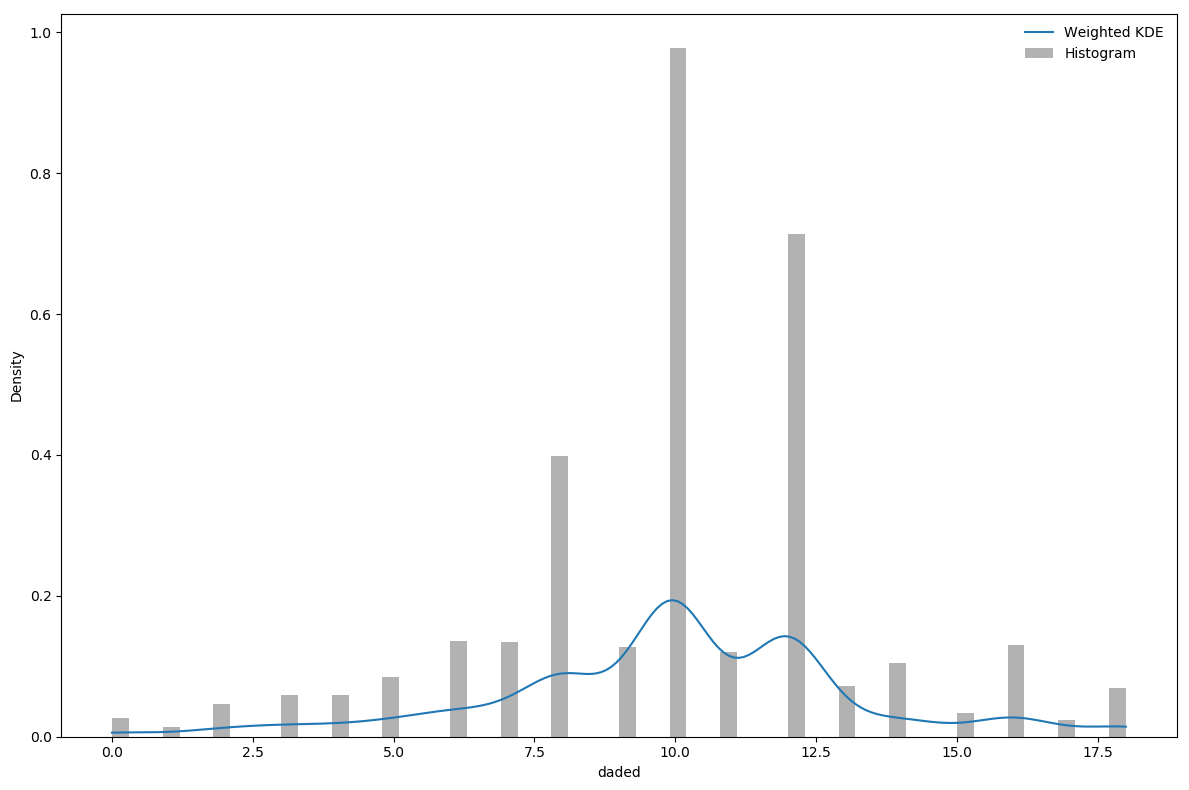

                daded
Weight    3010.000000
Mean         9.988904
StdDev       3.266501
Min          0.000000
25%          8.000000
50%          9.940000
75%         12.000000
Max         18.000000
Skewness    -0.249238
Kurtosis     0.831486


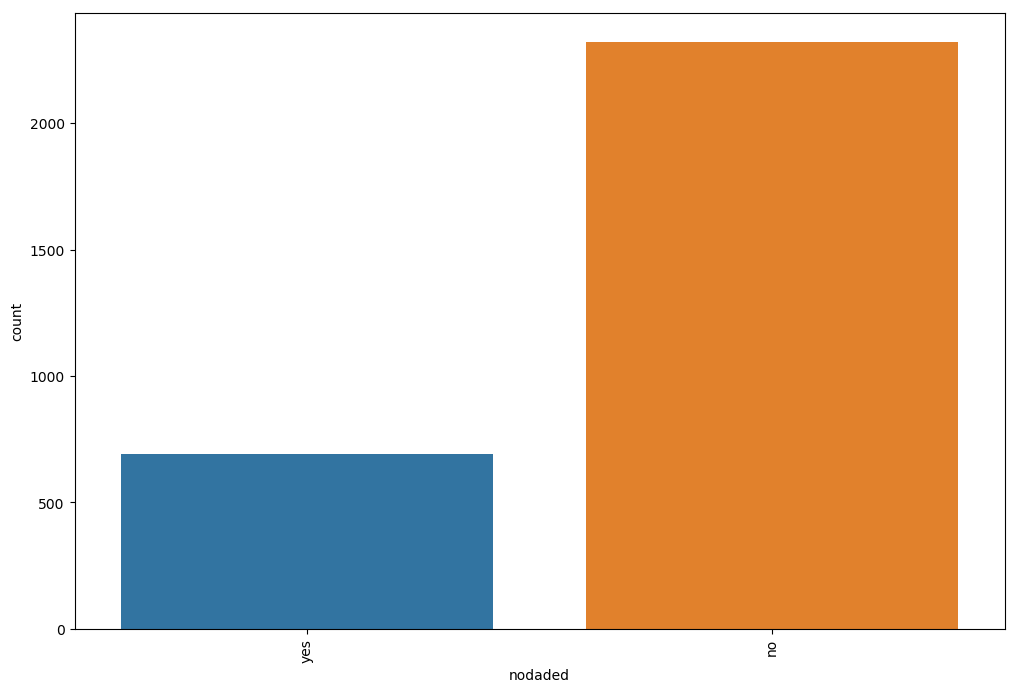

Level                     Weight
no                        2320
yes                       690


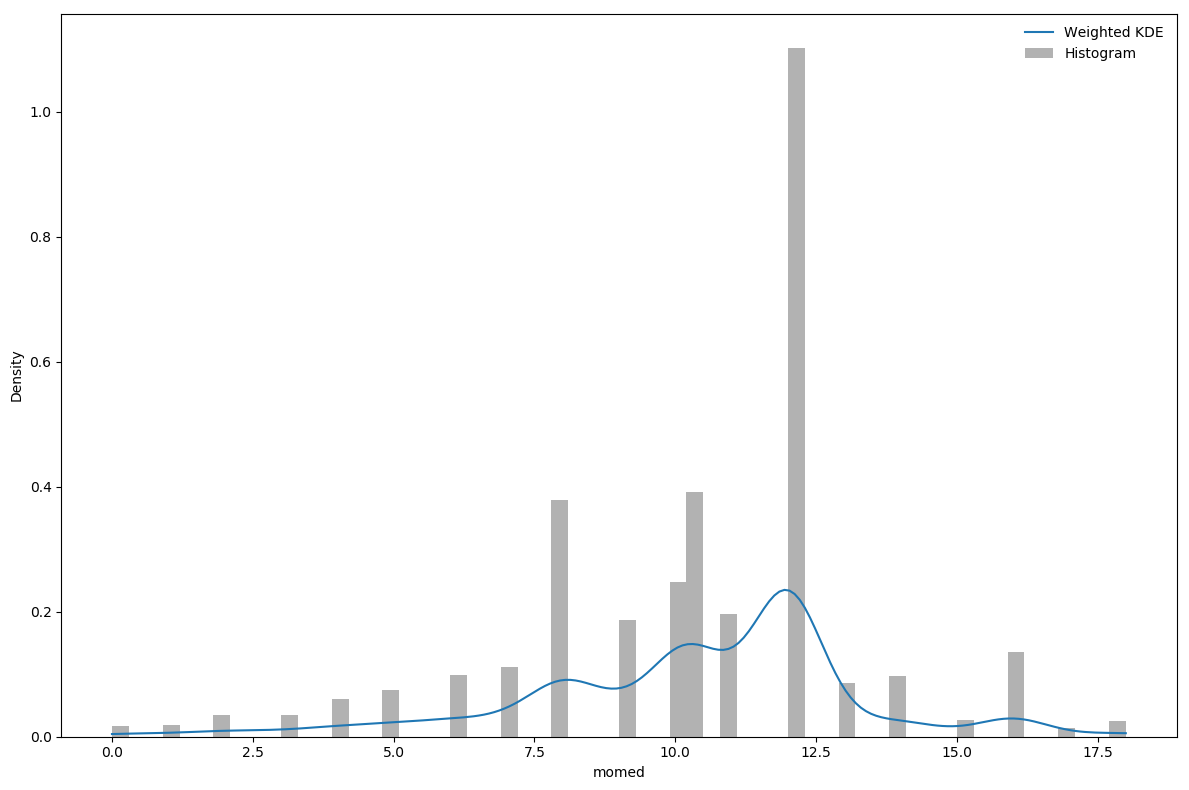

                momed
Weight    3010.000000
Mean        10.336628
StdDev       2.987510
Min          0.000000
25%          9.000000
50%         11.000000
75%         12.000000
Max         18.000000
Skewness    -0.646349
Kurtosis     1.184450


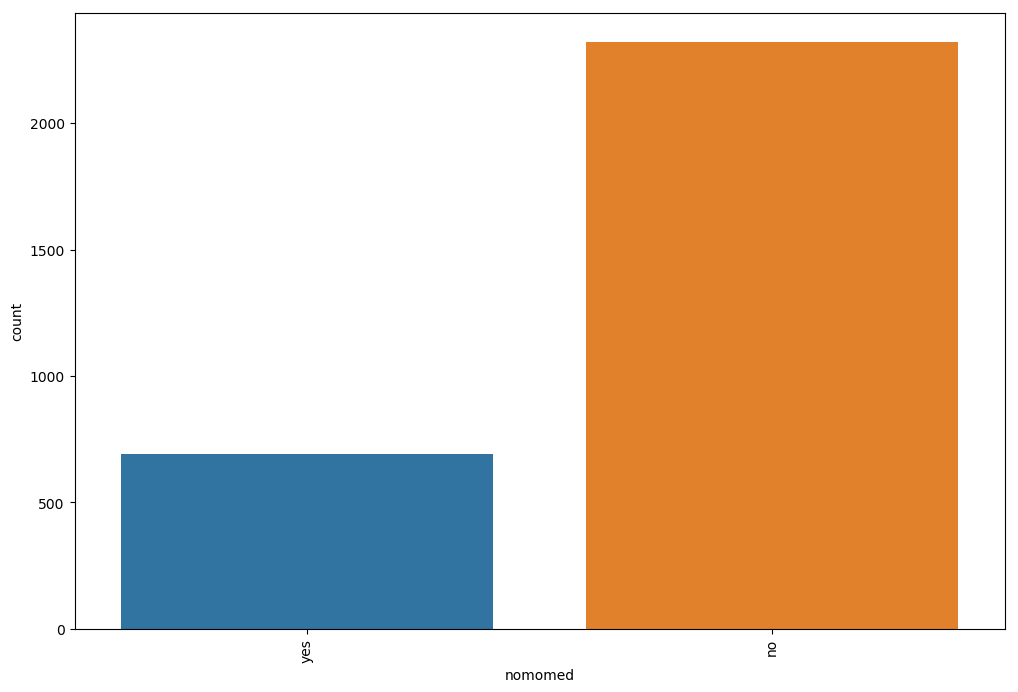

Level                     Weight
no                        2320
yes                       690


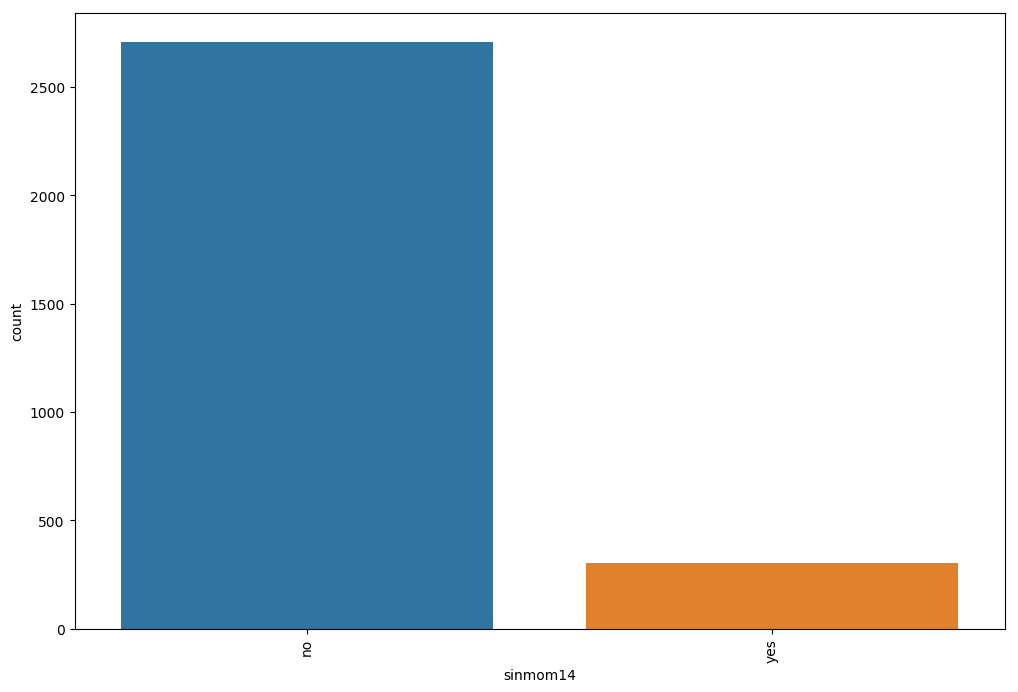

Level                     Weight
no                        2707
yes                       303


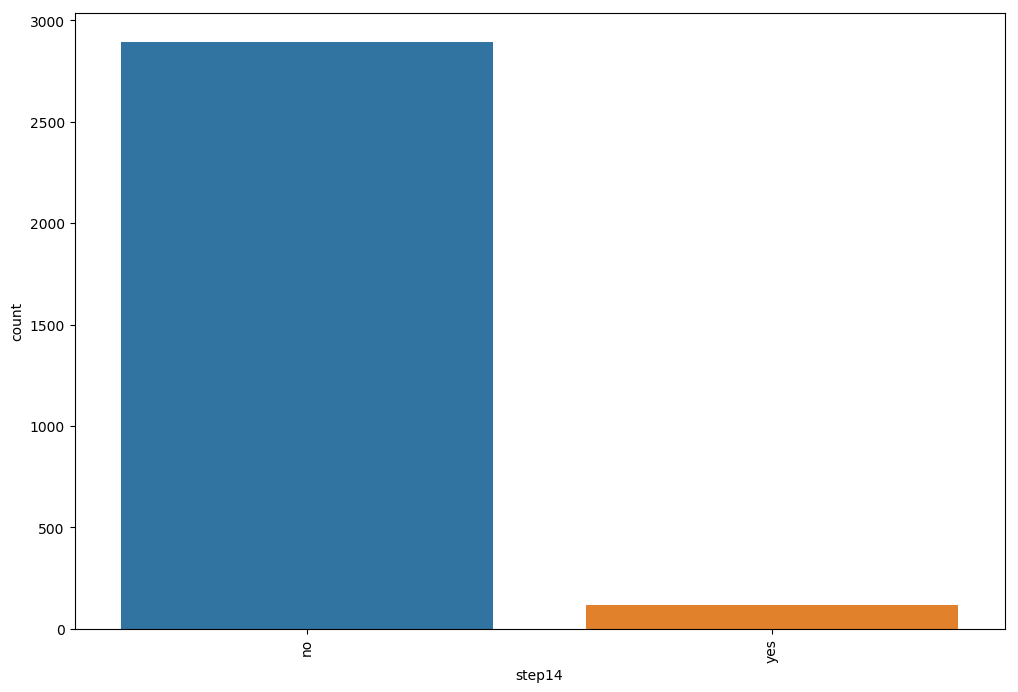

Level                     Weight
no                        2893
yes                       117


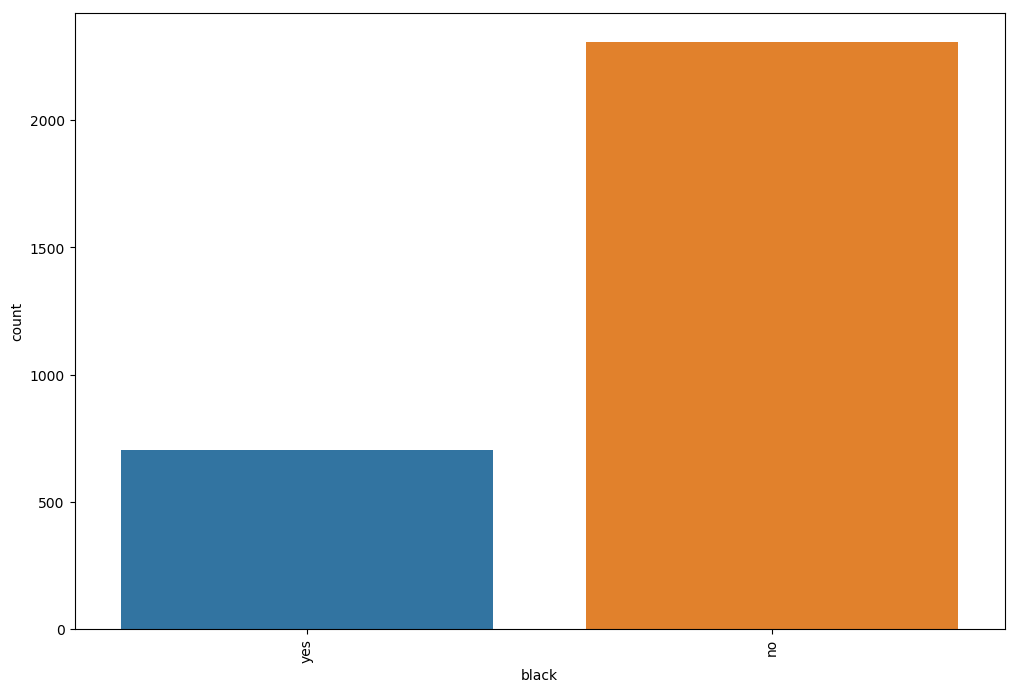

Level                     Weight
no                        2307
yes                       703


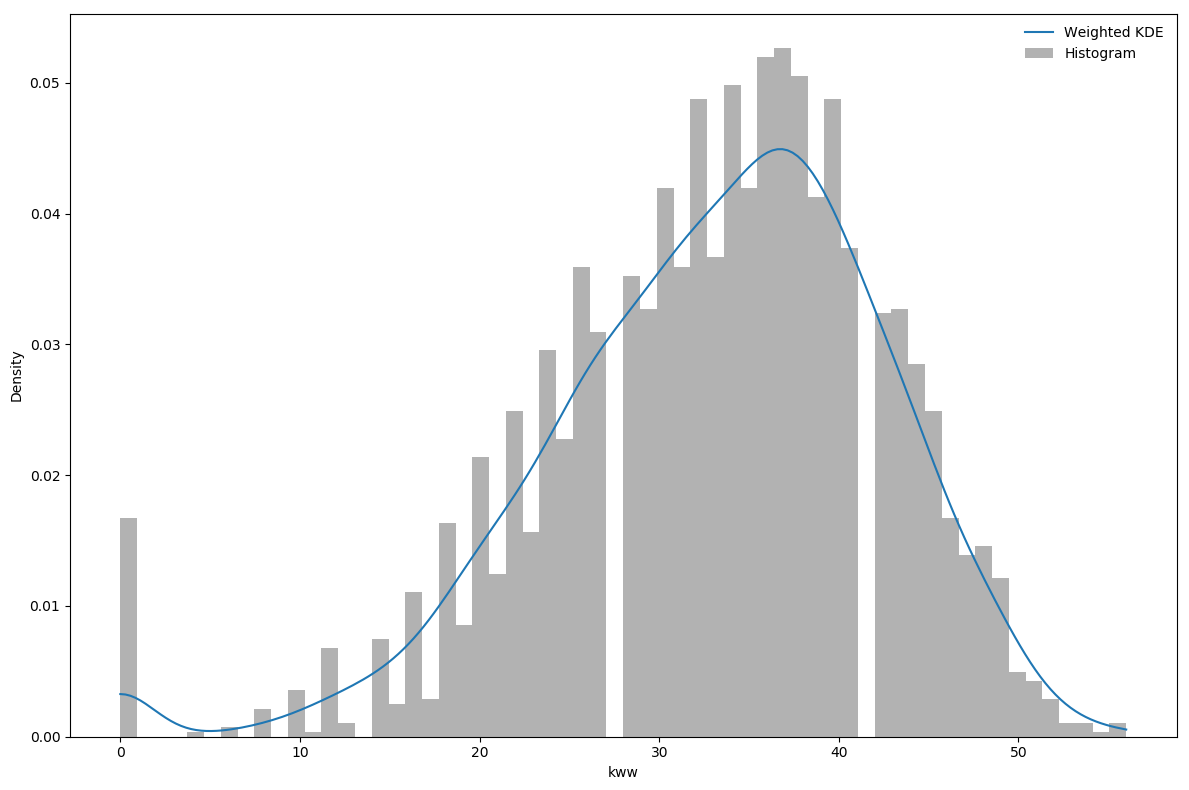

                  kww
Weight    3010.000000
Mean        33.016944
StdDev       9.502586
Min          0.000000
25%         27.000000
50%         34.000000
75%         40.000000
Max         56.000000
Skewness    -0.758818
Kurtosis     1.086388


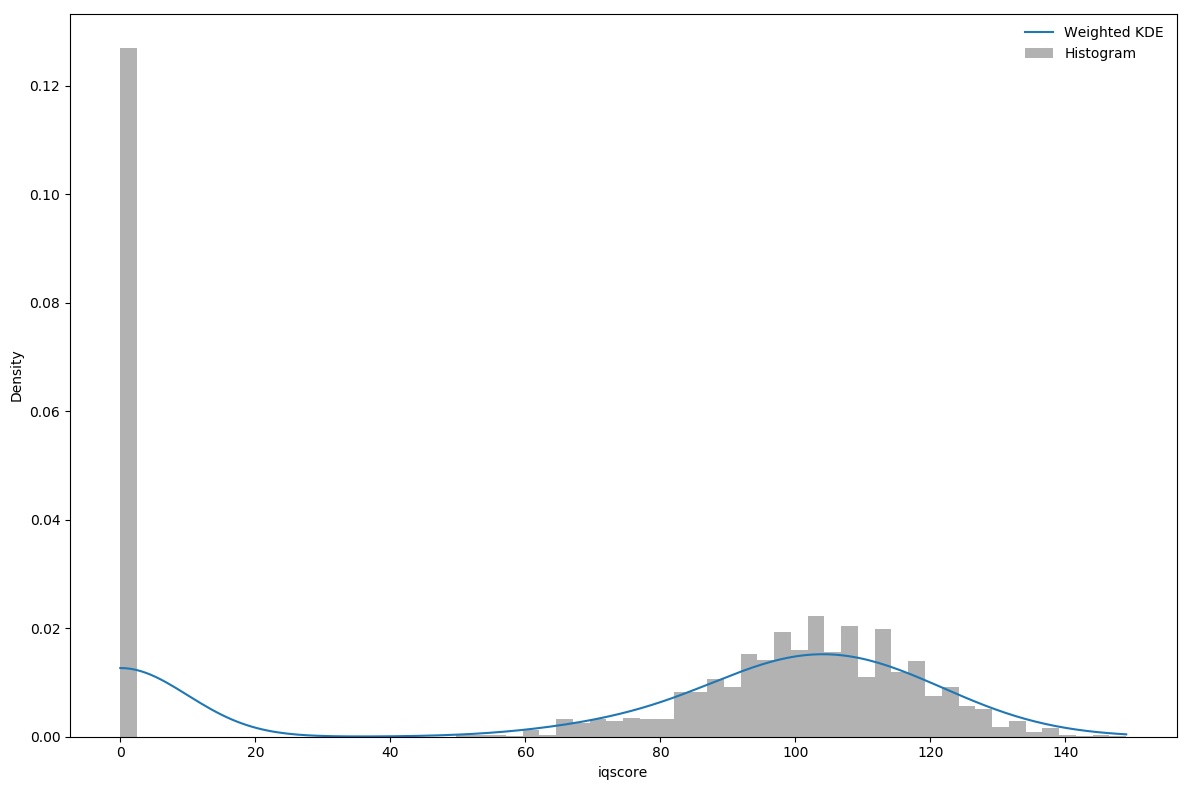

              iqscore
Weight    3010.000000
Mean        70.149169
StdDev      49.289738
Min          0.000000
25%          0.000000
50%         94.000000
75%        108.000000
Max        149.000000
Skewness    -0.591533
Kurtosis    -1.403666


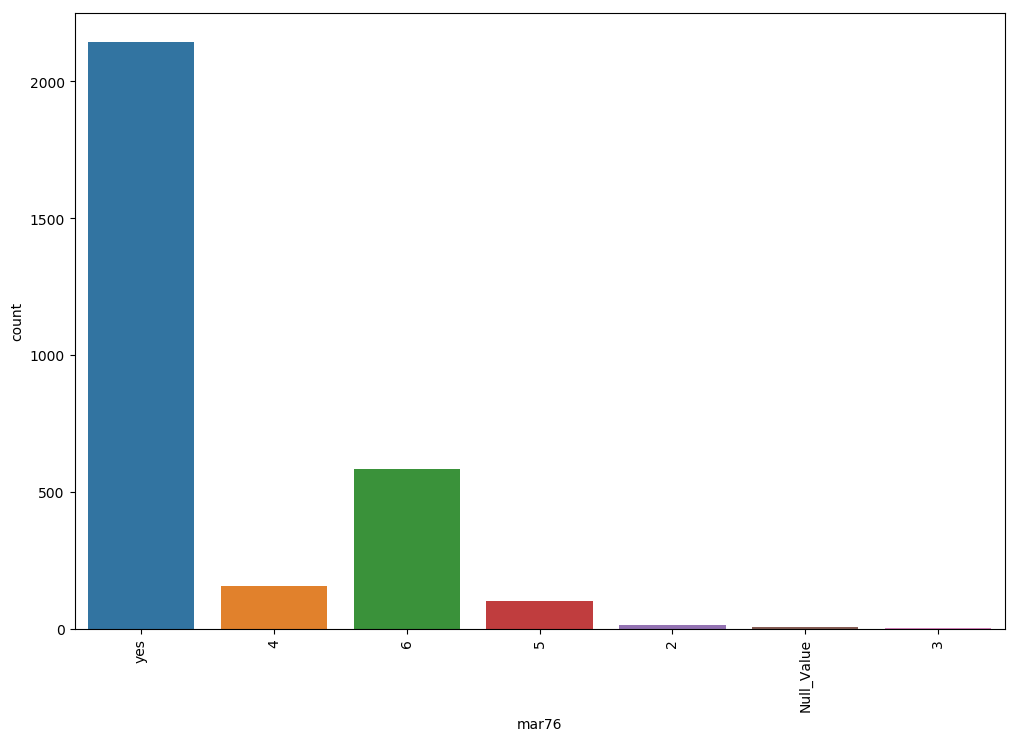

Level                     Weight
2                         14
3                         3
4                         155
5                         102
6                         585
Null_Value                7
yes                       2144


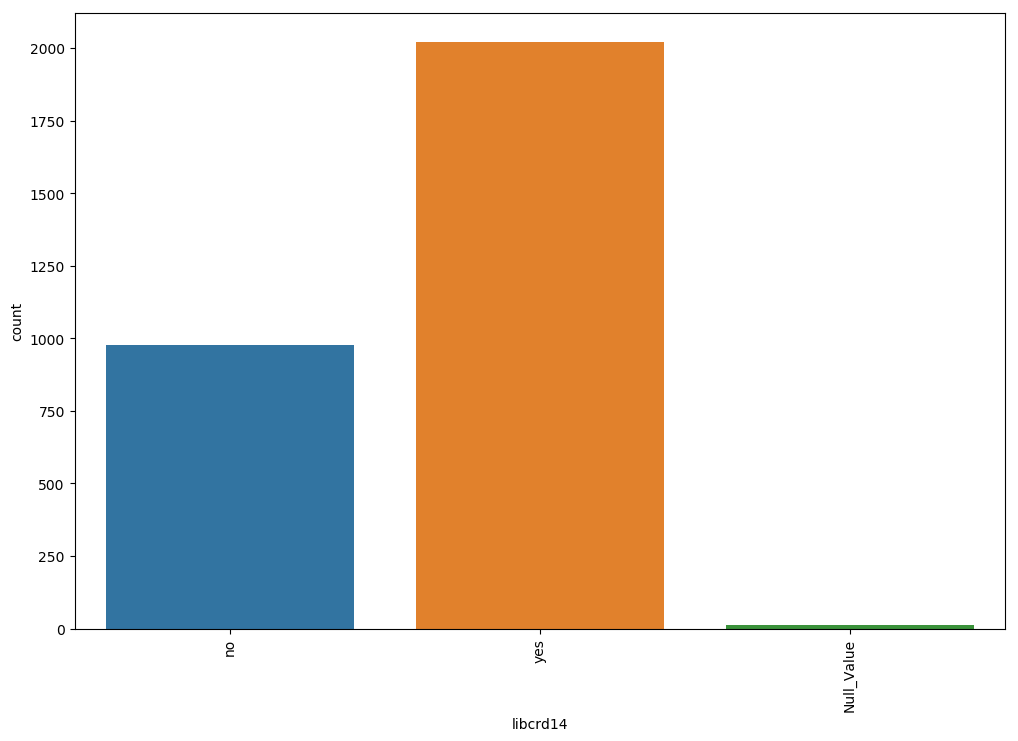

Level                     Weight
Null_Value                13
no                        976
yes                       2021


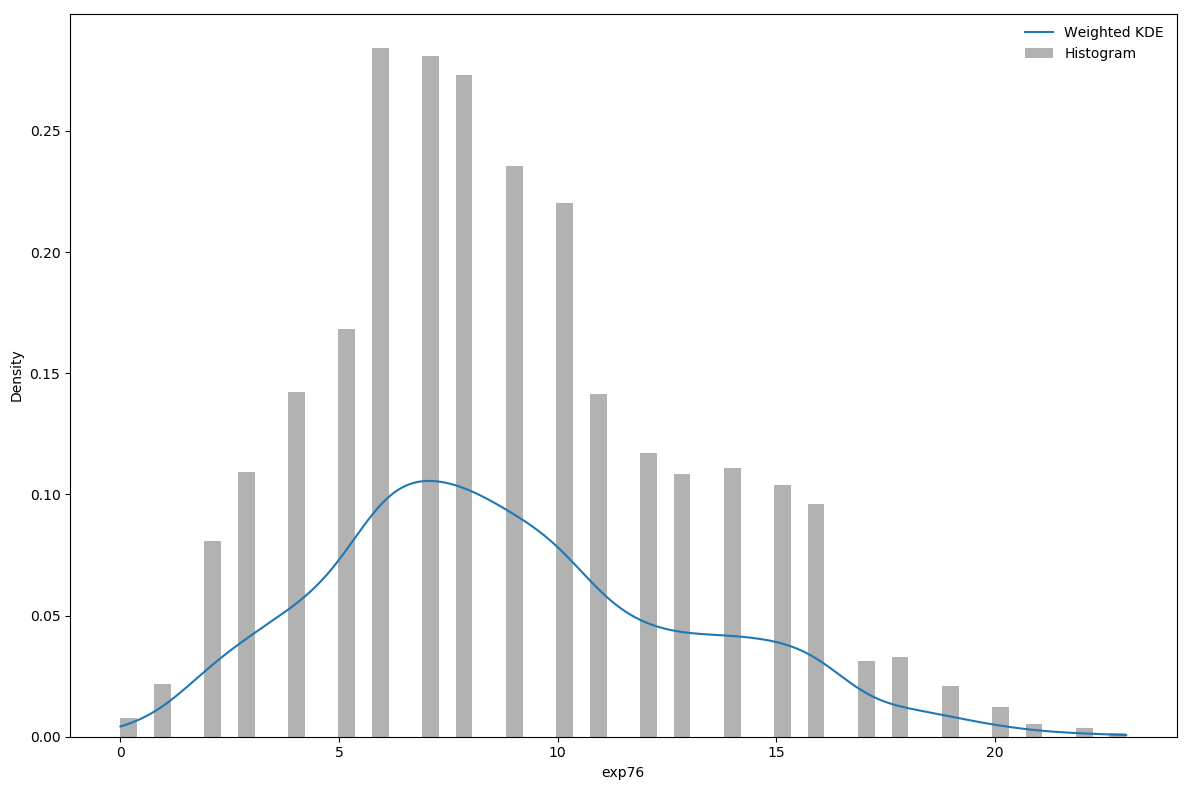

                exp76
Weight    3010.000000
Mean         8.856146
StdDev       4.141672
Min          0.000000
25%          6.000000
50%          8.000000
75%         11.000000
Max         23.000000
Skewness     0.494955
Kurtosis    -0.182994


In [38]:
#warnings.filterwarnings('ignore')

EDATools.EDA(dataset, predictors, numeric_cat_index)

<a name="part-two---predictor-correlation"></a>
# Part Two - Predictor Correlations and Clustering

In any modeling project it is important to understand correlations that exist between predictor variables. This plays a role in variable selection and can effect the speed of convergence when fitting models. Aside from the last section, correlations between continuous and categorical variables are explored separately.

<a name="correlation-between-continuous-variables"></a>
## Correlation Between Continuous Variables

The Pearson correlation is calculated for each pair of continuous variables. The scatter plot and Pearson correlation are given for each pair of variables with correlation above p_threshold (defaulted to 0.5). If you have ordinal variables or your data greatly violates the assumptions of a Pearson correlation, it may be worth adding either Kendal's $\tau$ or Spearman's $\rho$ as alternative measures of correlation. 

Pearson Correlation - Predictors
age76 and exp76 = 0.76
ed76 and exp76 = -0.65
ed76 and ed66 = 0.61
ed66 and kww = 0.58
ed66 and age76 = 0.56
daded and momed = 0.54


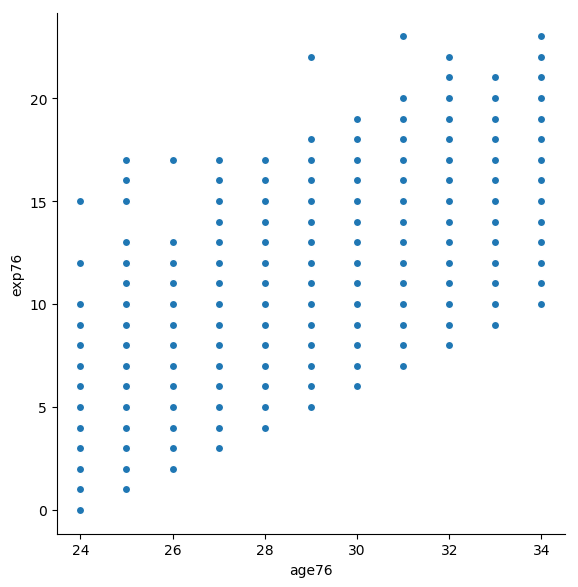

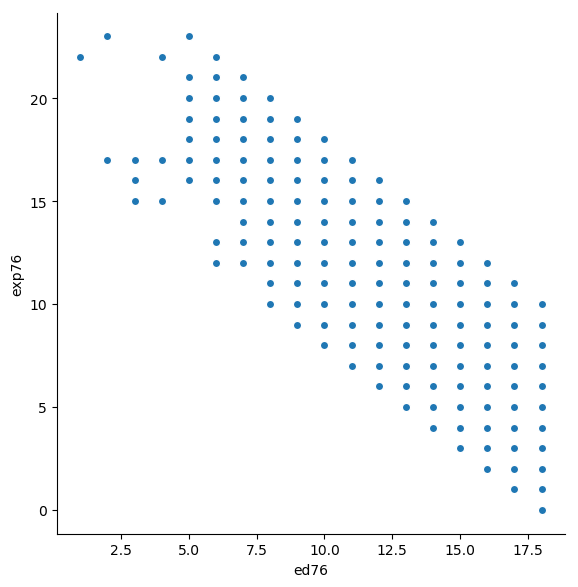

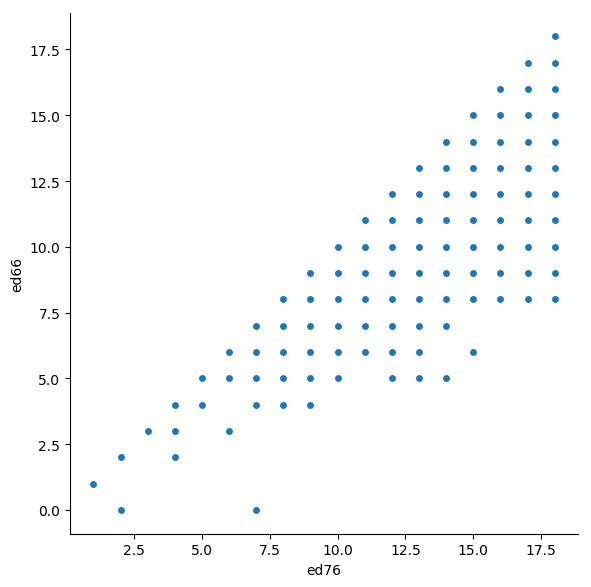

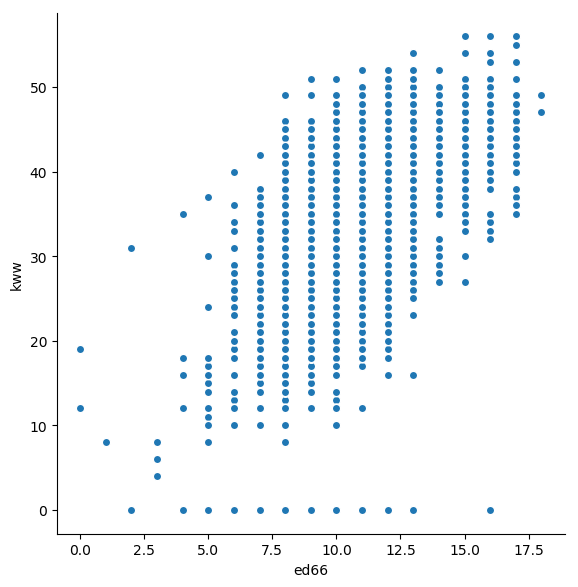

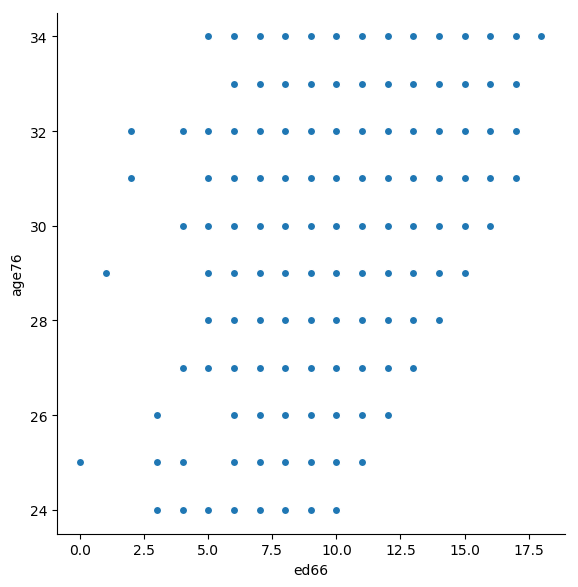

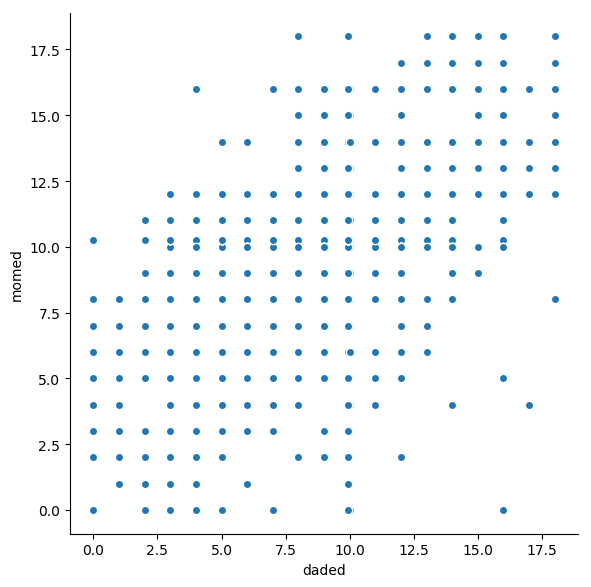

In [39]:
EDATools.Correlations_Cont(dataset, predictors, p_numeric_cat_index= numeric_cat_index)

Above we looked for pair-wise correlations, below we take a broader view and look at overall dimensionality. Principal component analysis (PCA) is a method of finding latent features (i.e. principal components) that describe a large portion of the variance among the predictor variables. Below is a graph the portion of the variance explained by each principal component on its own (top) and the cumulative variance explained by the first $n$ components (bottom). A sharp decay in the top graph implies that there is a lot of redundancy in the predictor variables and dimension reduction should be done. By default (p_normalize = True) each variable is normalized so that it has a mean of 0 and standard deviation of 1. This avoids creating a bias for the principal components to tend to variables with larger scales. It is important to note that PCA projects your features onto a *linear* subspace of the feature space. If you are interested in non-linear dimension reduction, variational autoencoders would be another option to consider.

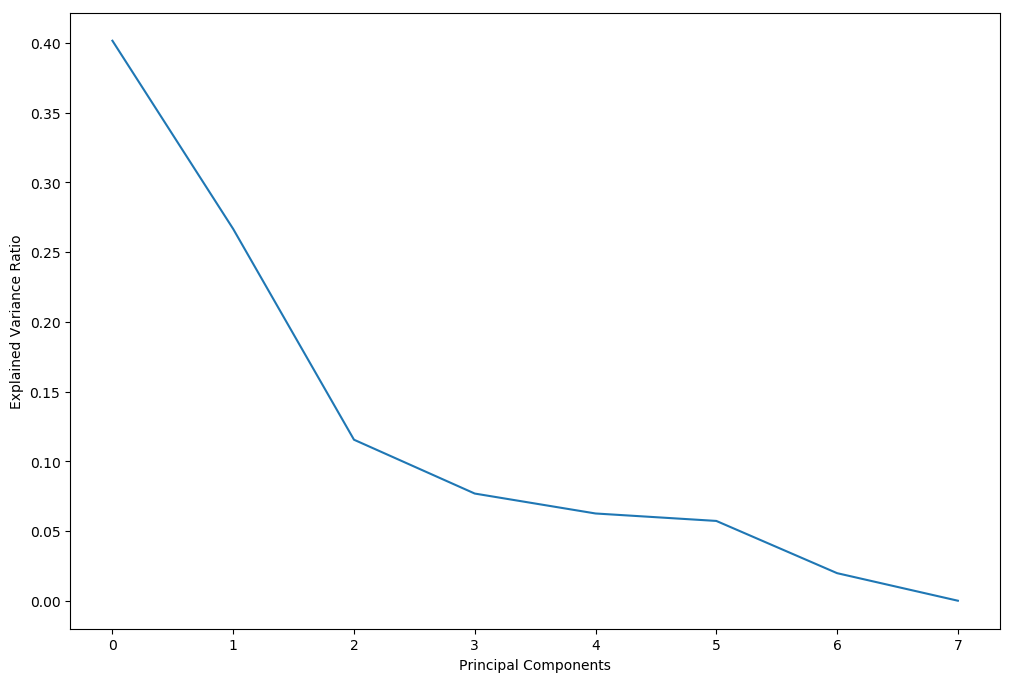

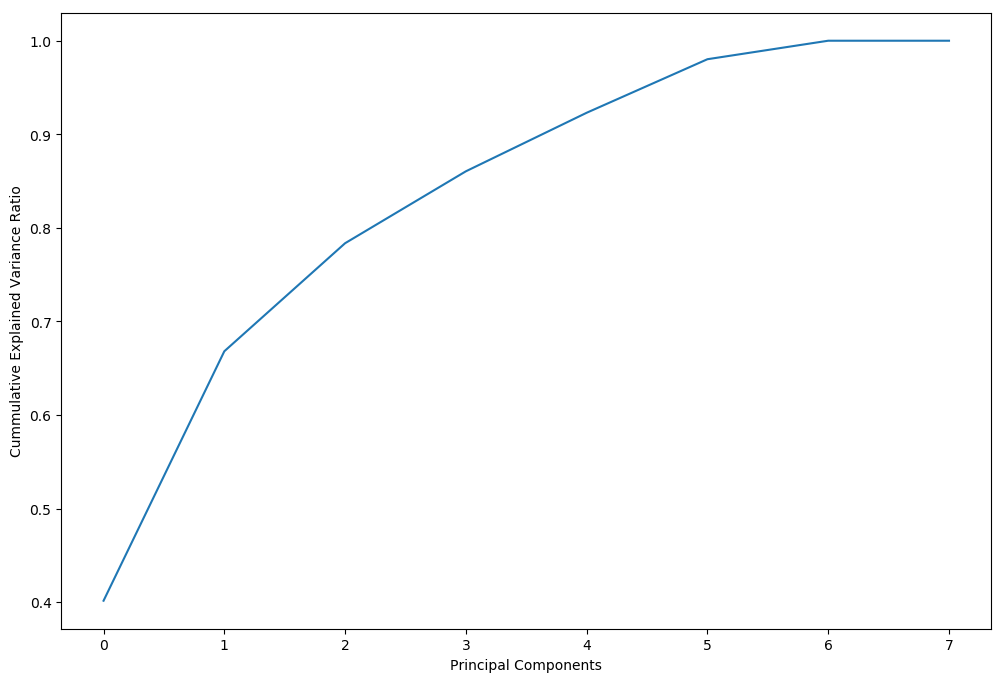

In [40]:
EDATools.PCAnalysis(dataset, predictors, numeric_cat_index)

In order to help with dimension reduction, it is often useful to know which groups of variables are correlated (also known as feature agglomeration). We will need some notion of distance on the feature space in order to find variables that are "close" together. To do this, define the following pseudometric $d$ on the feature space using Pearson correlation ($r$).

$$d(x,y) = 1 - |corr_r(x,y)|$$

A feature is then assigned to a cluster when it is within p_threshold (defaulted to 0.5) of some feature in that cluster. The dendogram will help visualize how the clusters are formed. Prior to calculating the correlation, each variable is normalized so that the mean is 0 and variance is 1. To calculate the feature clusters without normalization, set p_normalize = False.  

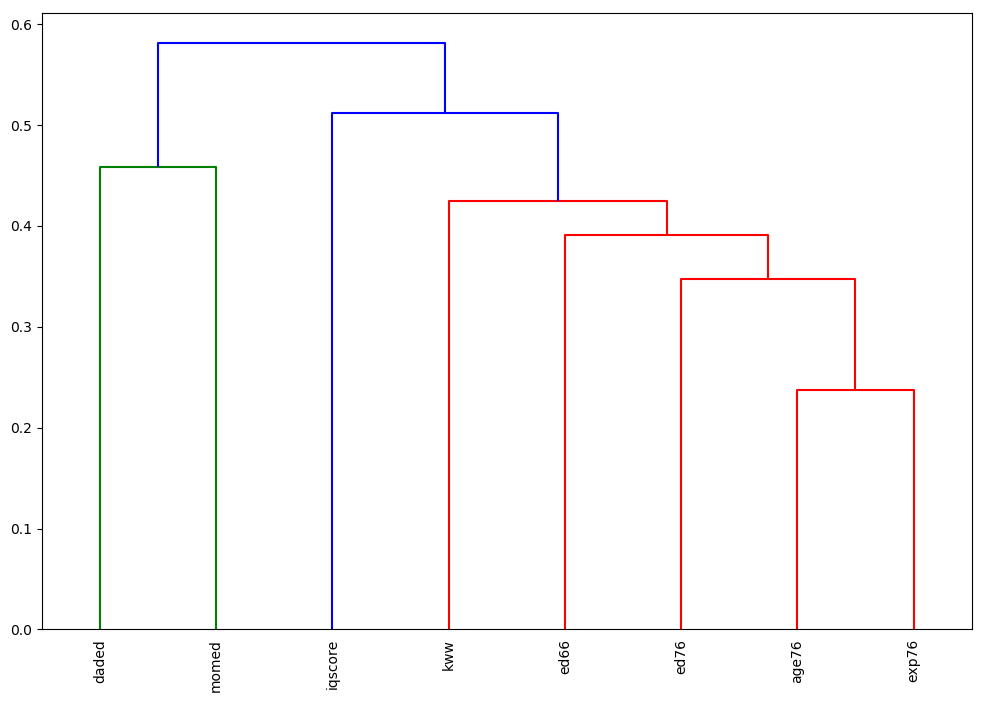

   Cluster  Feature
3        1    daded
4        1    momed
0        2     ed76
1        2     ed66
2        2    age76
5        2      kww
7        2    exp76
6        3  iqscore


In [41]:
cont_clusters = EDATools.FeatureClusters2(dataset, predictors, numeric_cat_index) 

<a name="correlation-between-categorical-variables"></a>
## Correlation Between Categorical Variables

This section is very similar to above, except with categorical variables. For each pair of categorical variables, we compute the Cramer's V statistic ($\phi_c$), which provides a measure of correlation between nominal variables. Cramer's V, $\phi_c \in [0,1]$, is defined so that values close to 1 imply a higher level of correlation. A stacked bar chart and $\phi_c$ are given for each pair with correlation above p_threshold (defaulted to 0.5). The bar charts are scaled so that it shows percentage of exposure in each category; use p_scaled = "No" for unscaled charts or p_scaled = "Both" for both a scaled and unscaled chart. 

Cramer's V Correlation - Predictors
nodaded and sinmom14 = 0.56
nomomed and sinmom14 = 0.56


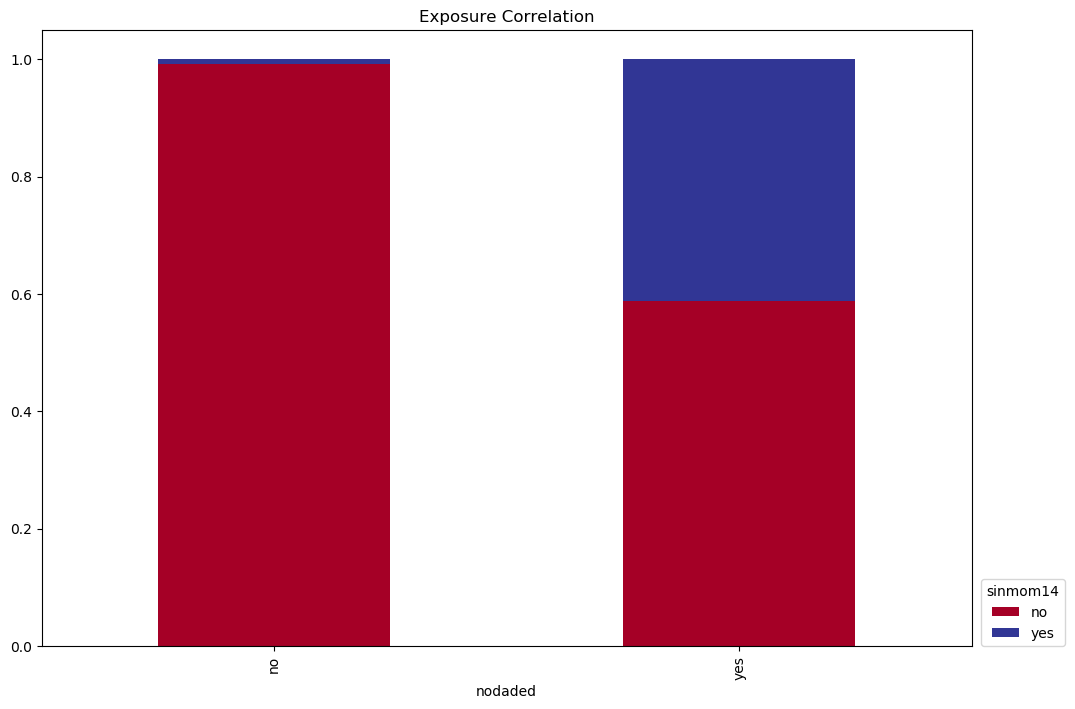

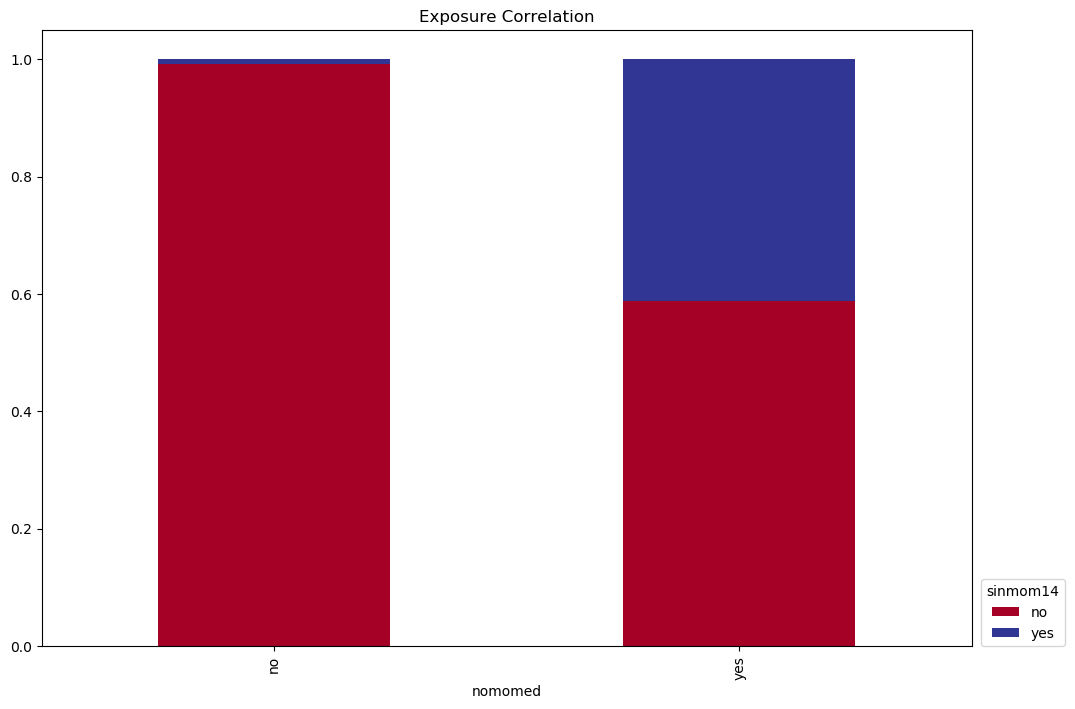

In [42]:
CVMatrix = EDATools.CramersVMatrix(dataset,predictors,numeric_cat_index)
EDATools.Correlations_Cat(dataset, predictors, numeric_cat_index, p_corr_matrix = CVMatrix) 

Similar to above, analyze the dimensionality of the categorical variables and consider dimension reduction if there is a sharp drop off in the top graph. Principal component analysis cannot be directly applied here since we are looking at categorical variables. However, we can perform a similar analysis by computing the eigenvectors and eigenvalues of Cramer's V matrix, where the $(i,j)$th component is the Cramer's V statistic of the $i$th and $j$th variable. The eigenvectors are analagous to principal components and the eigenvalues capture the portion of variance exaplained by the corresponding eigenvector.   

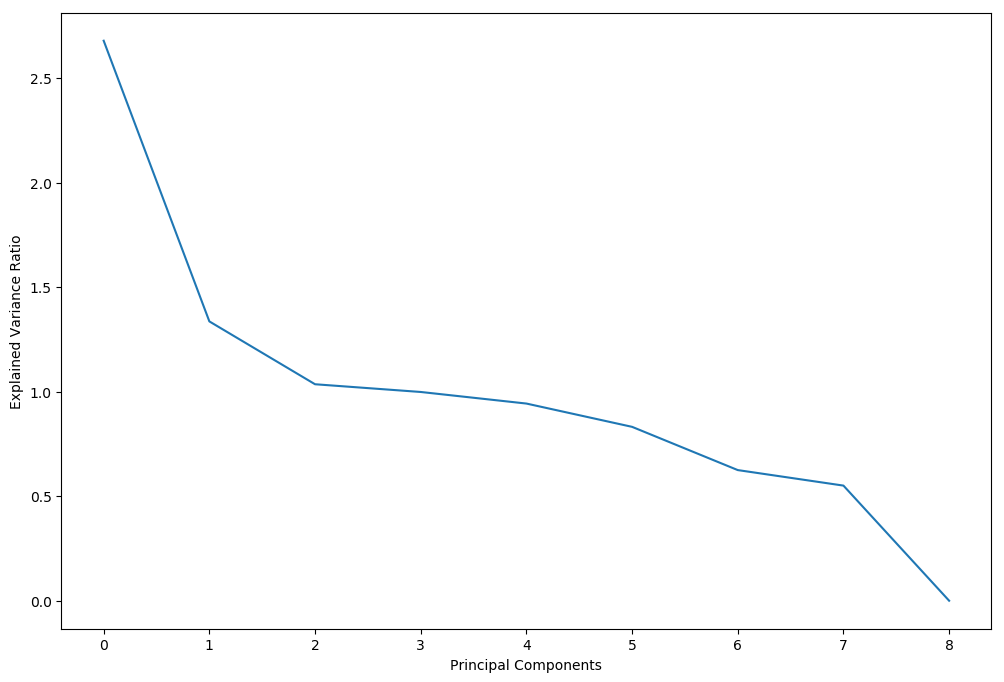

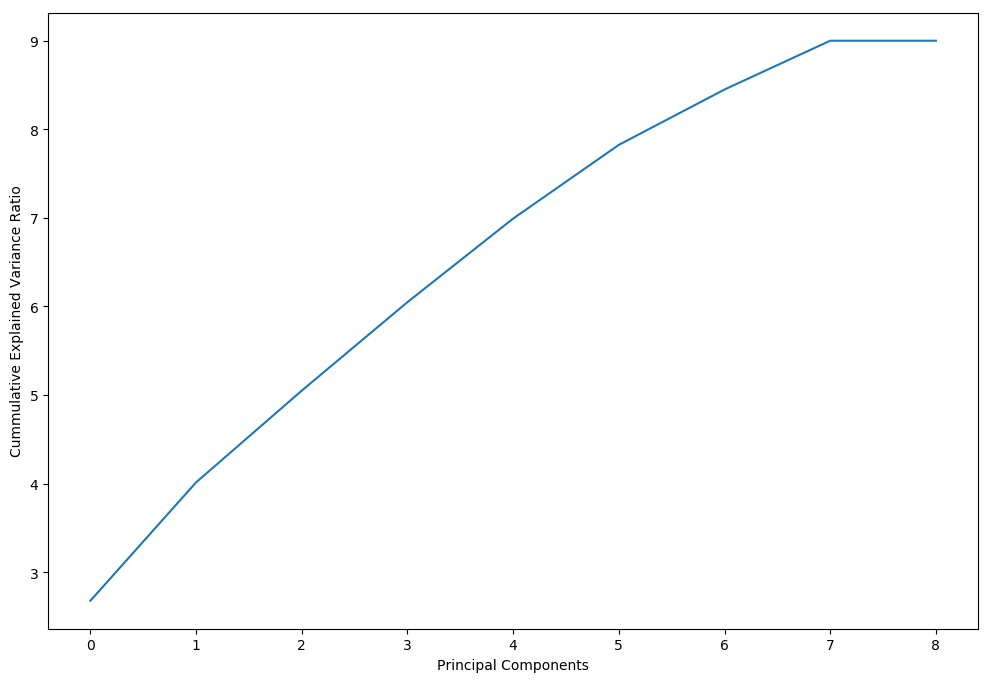

In [43]:
EDATools.PCACat(CVMatrix)

In order to cluster our categorical variables, we need a notion of distance in the categorical feature space. Using Cramer's V ($\phi_c$) in place of Pearson correlation, define a "distance" between variables $x$ and $y$.

$$d(x,y) = 1 - \phi_c(x,y)$$

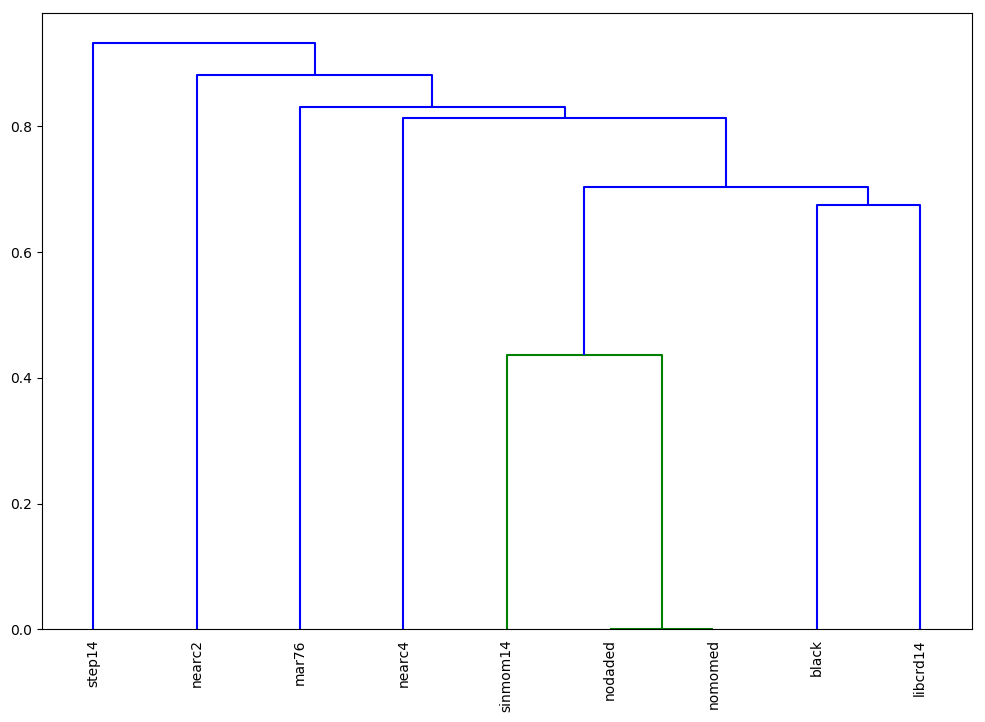

   Cluster   Feature
2        1   nodaded
3        1   nomomed
4        1  sinmom14
6        2     black
8        3  libcrd14
1        4    nearc4
7        5     mar76
0        6    nearc2
5        7    step14


In [44]:
cat_clusters = EDATools.CatFeatureClusters(CVMatrix, predictors, dataset, numeric_cat_index)

<a name="correlation-between-continuous-and-categorical-variables"></a>
## Correlation Between Continuous and Categorical Variables

Here we want to come up with a notion of correlation (or distance in feature space) between continuous and categorical variables. A canonical definition is more challenging in this case. One method of quantifying correlation is by using a one-way ANOVA (equivalently a linear regression with one categorical predictor) and using $p$-values to quantify correlation. Here we will run a one-way ANOVA for each pair of continuous and categorical variable, and return the $p$-value for each ANOVA below p_p_val (defaulted to 0.01) along with a box-plot for each pair. ANOVA assumes that the data is normally distributed and that each category has equal variance. While ANOVA is robust to violations of these assumptions, in certain cases it might be better to use a non-parametric alternative (e.g. Kruskal-Wallis). If you come up with alternative notions of correlation, please add them to EDATools.py 

One-way ANOVA p-values - Predictors
kww and black = 1.9e-06
momed and black = 6.8e-06
exp76 and libcrd14 = 0.00022
daded and black = 0.00058
ed76 and libcrd14 = 0.0015
momed and libcrd14 = 0.0021
iqscore and nearc4 = 0.0092


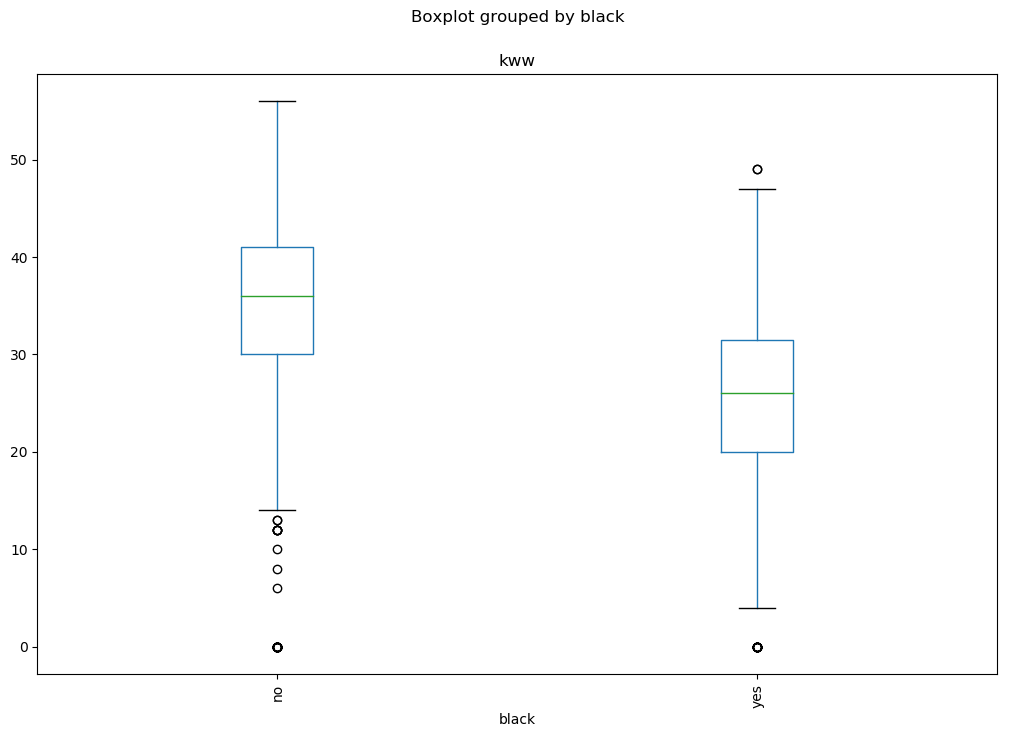

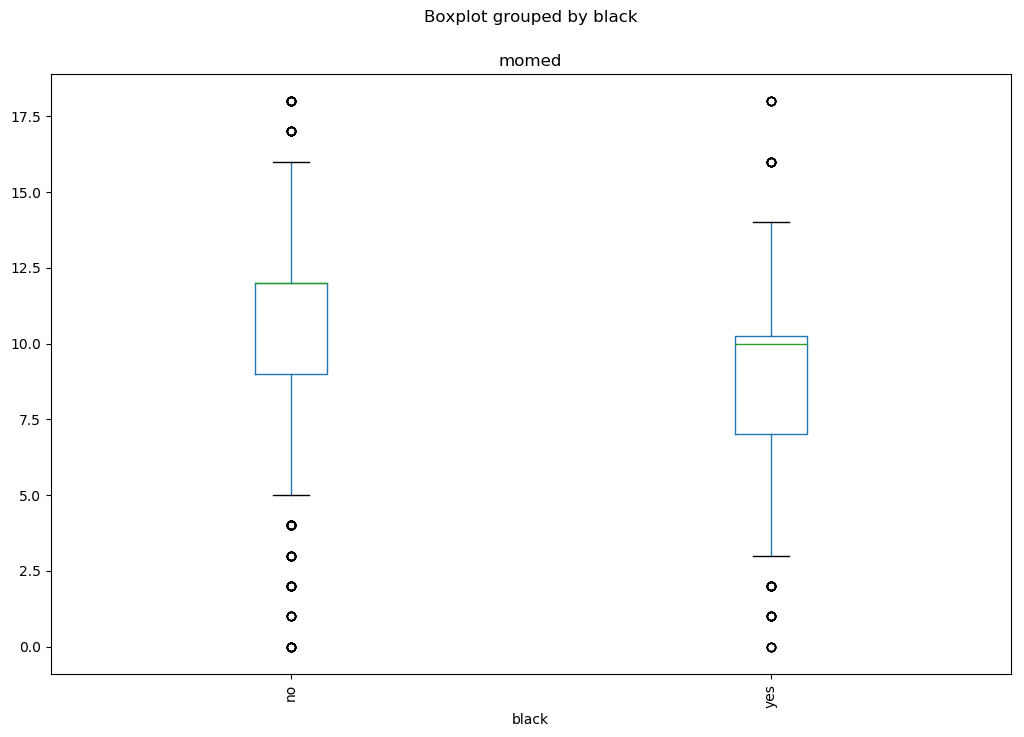

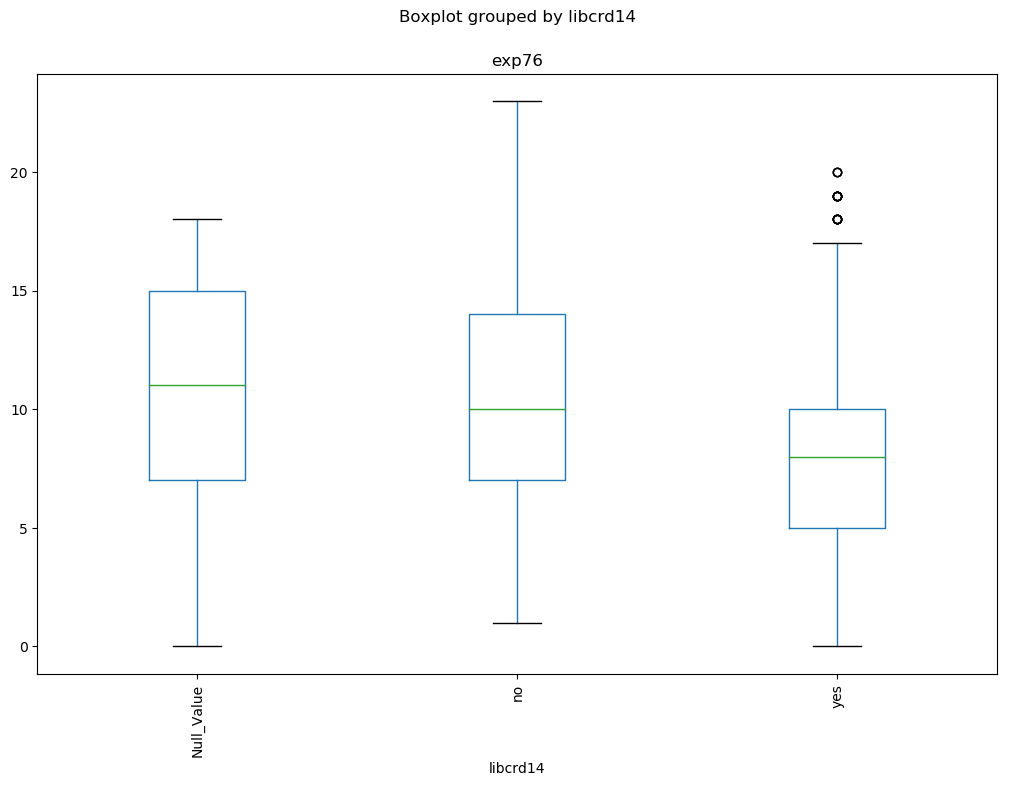

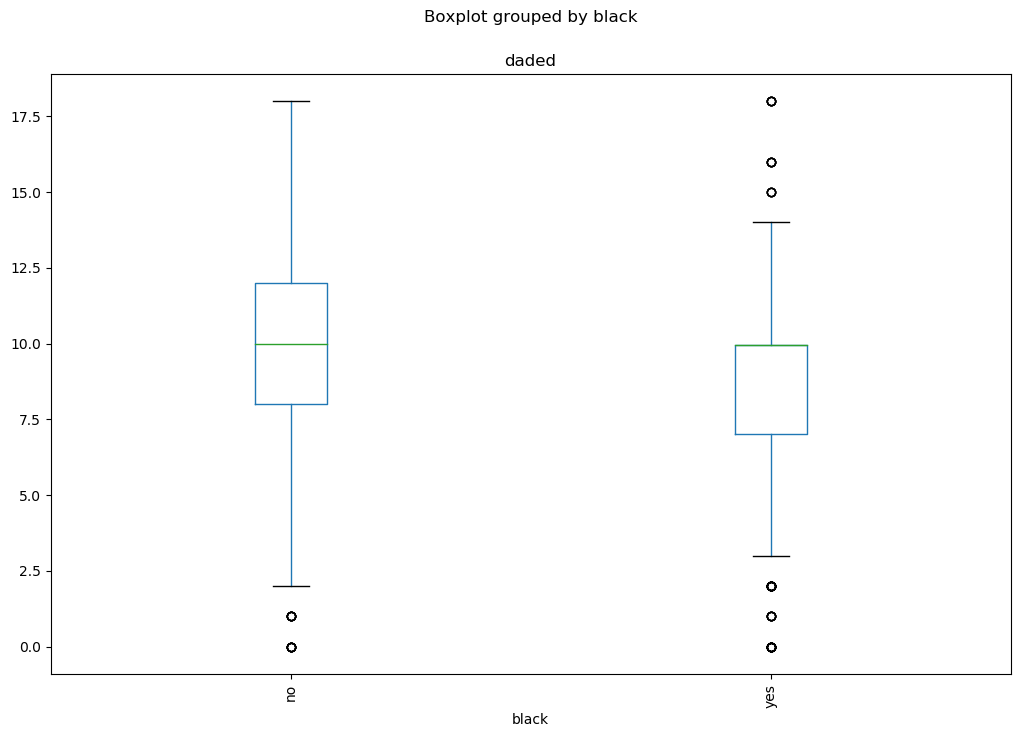

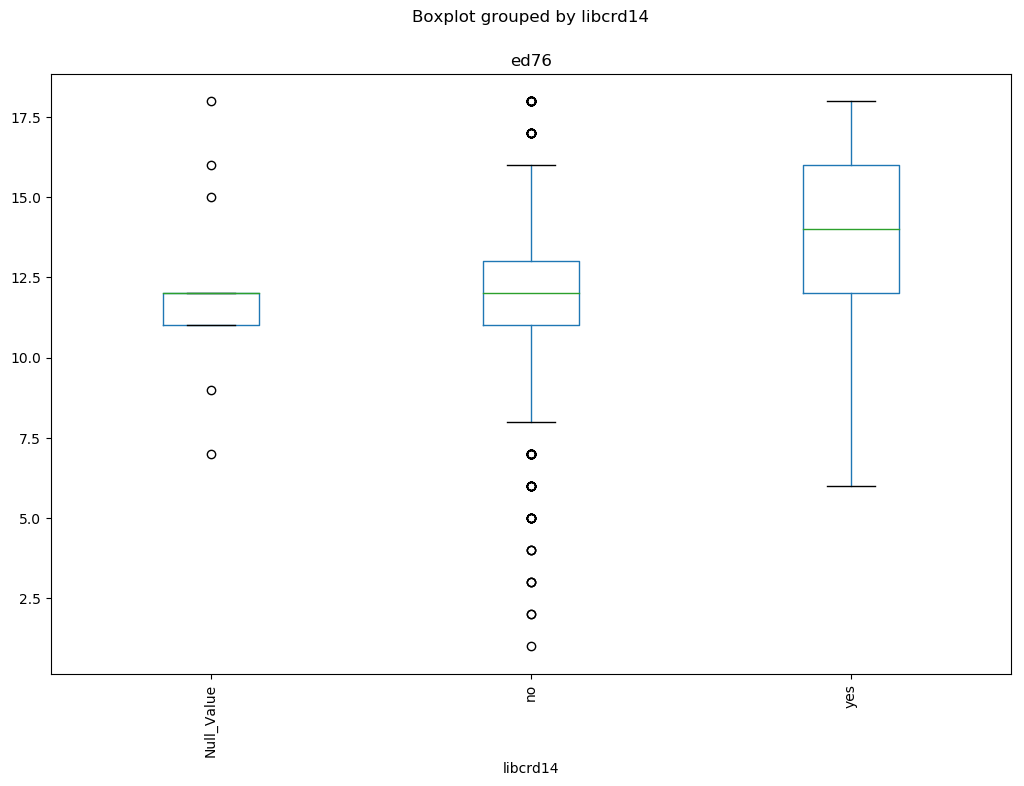

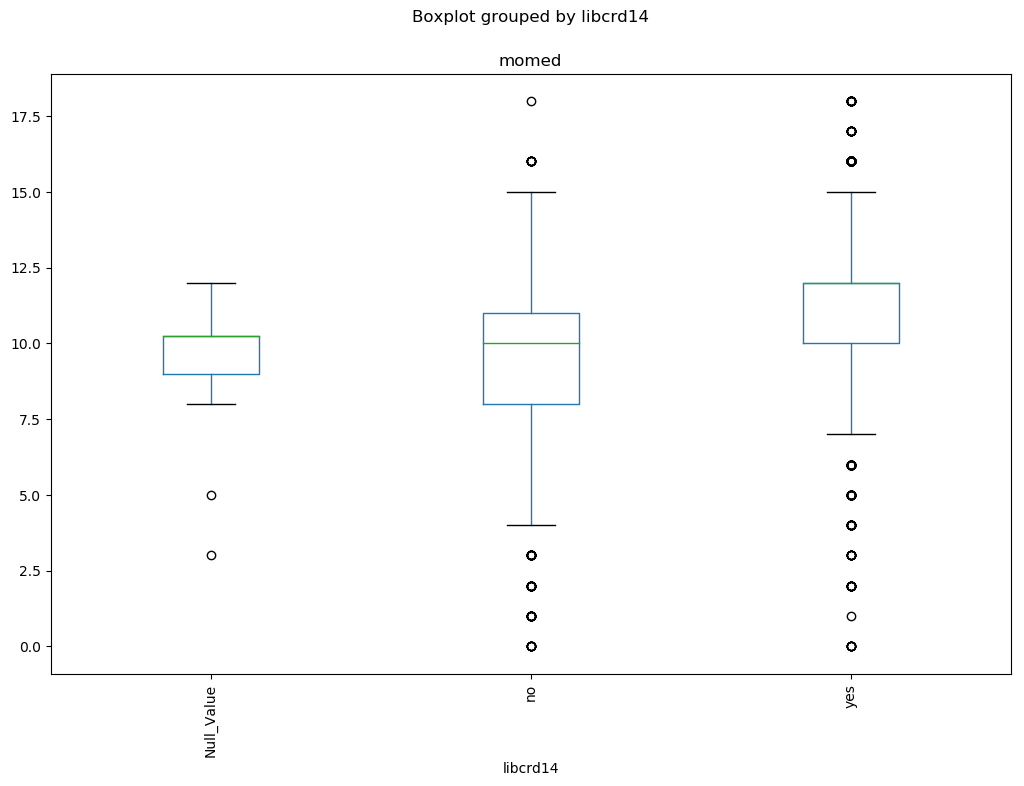

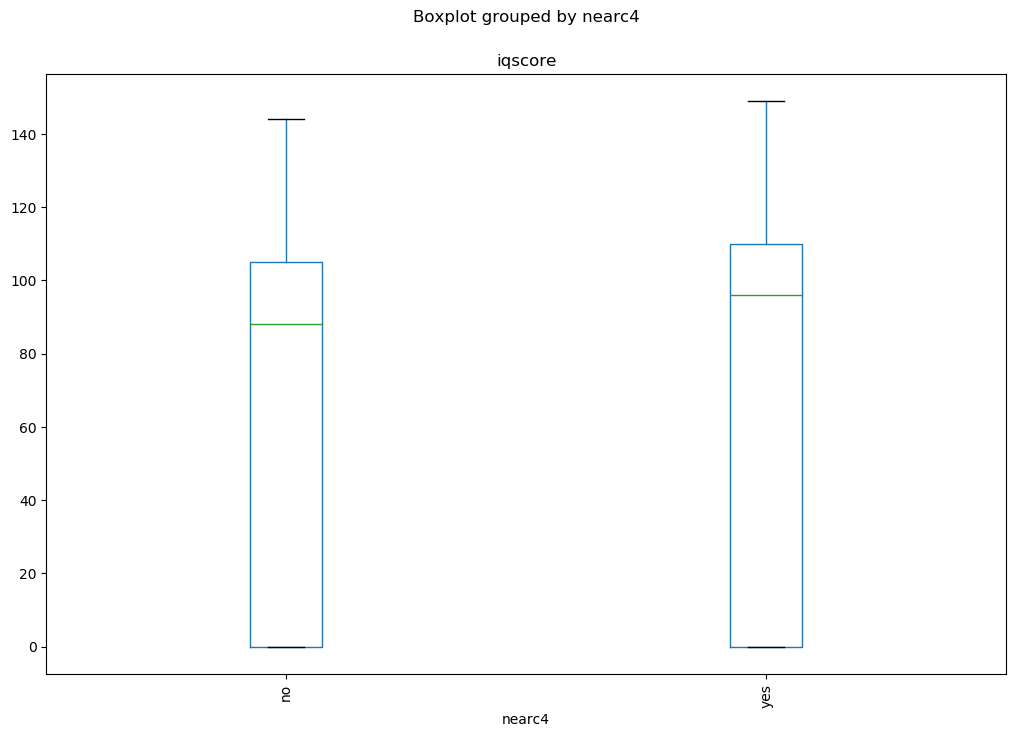

In [45]:
warnings.filterwarnings('ignore')

cont_cat_dist = EDATools.Correlations_Cont_Cat(dataset, predictors, numeric_cat_index)

Finally we would like to look for clusters of correlated variables, independent of whether they are continuous or categorical. To do that we will take the continuous clusters and categorical clusters we formed above and merge any pairs with a small $p$-value from the one-way ANOVA. In order to avoid daisy-chaining two continuous (or categorical) clusters that were not previously combined, we take the most significant (i.e. smallest $p$-value) linkages between categorical and continous clusters.

In [46]:
EDATools.ContCatFeatureClusters(cont_clusters,cat_clusters,cont_cat_dist)

Cluster 1: ['momed', 'daded', 'libcrd14']
Cluster 2: ['exp76', 'ed66', 'age76', 'black', 'ed76', 'kww']
Cluster 3: ['iqscore', 'nearc4']
Cluster 4: ['nodaded', 'nomomed', 'sinmom14']
Cluster 5: ['mar76']
Cluster 6: ['nearc2']
Cluster 7: ['step14']
